<a href="https://colab.research.google.com/github/evarahma61/analisis-sentimen-Tolak_RUU_IKN/blob/main/Lexicon_Based_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Nama : Eva Rahma Indriyani
<h3> NIM  : 118102011


<h2><b> Analisis Sentimen Menggunakan Metode Lexicon-Based




Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

<h4><b> Import Dataset

Mengimport data yang telah di crawling melalui twitter dengan menggunakan library python twint 

In [ ]:
import pandas as pd
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('18102011_EVA RAHMA INDRIYANI_A.csv')
data.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1448294529149259776,1448294529149259776,2021-10-13 14:28:18 UTC,2021-10-13,14:28:18,0,907415343299096577,latarterkemban4,LatarNanggroe,NaN,#tolakruu_ikn https://t.co/TSsynqbBFM,und,[],[],['https://pbs.twimg.com/media/FBlgDmcUYAQVlBx....,0,0,3,['tolakruu_ikn'],[],https://twitter.com/latarterkemban4/status/144...,False,NaN,1,https://pbs.twimg.com/media/FBlgDmcUYAQVlBx.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1447909667372367874,1447909667372367874,2021-10-12 12:59:00 UTC,2021-10-12,12:59:00,0,1273301834690473985,ratu_tagar,👑Rätû_TågªRحسن المرضية🛡,NaN,Jika sumber daya manusia di suatu negara berku...,in,[],[],[],0,0,2,['tolakruu_ikn'],[],https://twitter.com/Ratu_Tagar/status/14479096...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1446840579787087873,1446840579787087873,2021-10-09 14:10:49 UTC,2021-10-09,14:10:49,0,907415343299096577,latarterkemban4,LatarNanggroe,NaN,#TolakRUU_IKN https://t.co/inISfLLuRe,und,[],[],['https://pbs.twimg.com/media/FBQ1ylyUUAc8Bej....,0,0,2,['tolakruu_ikn'],[],https://twitter.com/latarterkemban4/status/144...,False,NaN,1,https://pbs.twimg.com/media/FBQ1ylyUUAc8Bej.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1446743096973086721,1446743096973086721,2021-10-09 07:43:28 UTC,2021-10-09,07:43:28,0,40423170,miyoels,miyoeL's,NaN,"Saya perhatiin, kalo kita googling tentang doa...",in,[],[],[],0,0,1,"['tolakruu_ikn', 'tolakruu_ikn']",[],https://twitter.com/miyoels/status/14467430969...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1446685463767498760,1399725334182912008,2021-10-09 03:54:27 UTC,2021-10-09,03:54:27,0,1101090936115716096,inyongbralink,inyong,NaN,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,in,[],[],[],0,0,0,['tolakruu_ikn'],[],https://twitter.com/inyongbralink/status/14466...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kusmayadi2409', 'name': '🏹mi...",NaN,NaN,NaN,NaN


Drop kolom yang tidak diperlukan

In [ ]:
mydata = data.drop(['username','user_id','id','conversation_id','created_at','date','time','timezone',
                    'name','place','language','mentions','urls','photos','replies_count',
                    'retweets_count','likes_count','hashtags','cashtags','link','retweet',
                    'quote_url','video','thumbnail','near','geo','source','user_rt','retweet_id',
                    'reply_to','retweet_date','translate','trans_src','trans_dest','user_rt_id','username'], axis=1)
mydata.head()


,tweet
0,#tolakruu_ikn https://t.co/TSsynqbBFM
1,Jika sumber daya manusia di suatu negara berku...
2,#TolakRUU_IKN https://t.co/inISfLLuRe
3,"Saya perhatiin, kalo kita googling tentang doa..."
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...


<h2><b> Step 1 : Cleaning Text

Cleaning merupakan step dimana data yang akan diolah harus dibersihkan terlebih dahulu. 

Data berupa tweets yang didapatkan dari twitter 
mengandung berbagai macam tipe informasi serta 
berbagai macam karakter spesial yang tidak 
diperlukan dalam proses analisis sentimen. Jika 
ditemukan data yang mengandung suatu link, maka 
akan dilakukan proses penghapusan URL. Selain 
itu, proses penghapusan juga dilakukan terhadap 
karakter spesial lainnya seperti hastag ataupun 
username dari suatu user (dituliskan @username)


In [ ]:
import re
# Define a function to clean the text
def clean(text):
 # Removes all special characters and numericals leaving the alphabets
 text = re.sub(r"http\S+", "", text) # menghilangkan URL gambar
 text = re.sub('@[^\s]+','',text) # menghilangkan mention username dalam tweets
 text = re.sub("@[A-Za-z0-9]+","",text) 
 text = re.sub('[^A-Za-z]+', ' ', text) #menghilangkan simbol dan karakter spesial yang bukan huruf/angka

 return text
# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['tweet'].apply(clean) #membuat kolom baru yang bernama 'Cleaned Reviews'
mydata

,tweet,Cleaned Reviews
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN
...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slop...
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa ...


<h2> <b> Steps 2-4: Tokenization, POS tagging, stopwords removal


- Tokenization adalah proses pemecahan teks 
dari sebuah kalimat menjadi potongan-potongan 
kata 
- POS Tagging merupakan kata yang telah dilabelisasi kelas kata berdasarkan kamus besar bahasa Indonesia. Dalam 
proses POS tagger dilakukan dengan cara parsing, kemudian ditentukan kelas tiap kata dengan 
menggunakan bantuan kamus yang di buat sendiri berdasarkan Kamus Besar Bahasa Indonesia 
(KBBI) menggunakan metode Maximum Entropy. Proses POS tagging terbagi ke dalam tiga 
proses yaitu pemisahan setiap token dalam dokumen dengan pengecekan setiap kata dalam 
dokumen, mengidentifikasi setiap kata dalam dokumen dengan pemberian jenis kata, pengecekan 
kata yang belum teridentifikasi terhadap bentuk imbuhan dan akhiran sehingga diperoleh kata 
dasar. 
- Stopword removal merupakan proses 
penghapusan kata-kata yang dianggap kurang/tidak
memiliki makna untuk mempengaruhi sentimen. 
Kata-kata yang dimaksud seperti “yang”, “di”, 
“dan”, “pada”, dan sebagainya.



Natural Language Toolkit atau disingkat NLTK, adalah libray python untuk bekerja dengan permodelan teks. NLTK menyediakan tools yang baik mempersiapkan teks sebelum digunakan pada machine learning atau algoritma deep learning

In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
  
mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,tweet,Cleaned Reviews,POS tagged
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,"[(tolakruu, n), (ikn, n)]"
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...,"[(Jika, n), (sumber, n), (daya, n), (manusia, ..."
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,"[(TolakRUU, n), (IKN, n)]"
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...,"[(Saya, n), (perhatiin, n), (kalo, n), (kita, ..."
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,"[(Ttp, n), (kompak, v), (sesama, a), (oposisi,..."


<h2><b>Step 5: Obtaining the stem words

<h3> <b> Lemmatization

Lemmatization adalah pengubahan kata-kata menjadi 
kata dasarnya

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
 lemma_rew = " "
 for word, pos in pos_data:
  if not pos:
    lemma = word
    lemma_rew = lemma_rew + " " + lemma
  else:
    lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
    lemma_rew = lemma_rew + " " + lemma
 return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,tweet,Cleaned Reviews,POS tagged,Lemma
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,"[(tolakruu, n), (ikn, n)]",tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...,"[(Jika, n), (sumber, n), (daya, n), (manusia, ...",Jika sumber daya manusia di suatu negara ber...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,"[(TolakRUU, n), (IKN, n)]",TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...,"[(Saya, n), (perhatiin, n), (kalo, n), (kita, ...",Saya perhatiin kalo kita google tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,"[(Ttp, n), (kompak, v), (sesama, a), (oposisi,...",Ttp kompak sesama oposisi TolakRUU IKN


In [ ]:
mydata[['tweet', 'Lemma']]

,tweet,Lemma
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN
...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum ...
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slo...
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa...


<h1><b>Sentiment analysis using TextBlob

TextBlob adalah salah satu library python untuk Natural Language Processing (NLP). TextBlob secara aktif menggunakan Natural Language ToolKit (NLTK) untuk mencapai tugasnya. NLTK adalah library yang memberikan akses mudah ke banyak sumber daya leksikal dan memungkinkan pengguna untuk bekerja dengan kategorisasi, klasifikasi, dan banyak tugas lainnya. TextBlob adalah librarysederhana yang mendukung analisis dan operasi kompleks pada data tekstual.

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
 return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
 return TextBlob(review).sentiment.polarity
# function to analyze the reviews
def analysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


TextBlob mengembalikan polaritas dan subjektivitas kalimat. Polaritas terletak antara [-1,1], -1 mendefinisikan sentimen negatif dan 1 mendefinisikan sentimen positif. Kata-kata negasi membalikkan polaritas. TextBlob memiliki label semantik yang membantu dengan analisis halus. Misalnya — emotikon, tanda seru, emoji, dll. Subjektivitas terletak di antara [0,1]. Subjektivitas mengukur jumlah opini pribadi dan informasi faktual yang terkandung dalam teks. Semakin tinggi subjektivitas berarti teks tersebut mengandung opini pribadi daripada informasi faktual. TextBlob memiliki satu parameter lagi — intensitas. TextBlob menghitung subjektivitas dengan melihat 'intensitas'. Intensitas menentukan apakah sebuah kata memodifikasi kata berikutnya. 

In [ ]:
fin_data = pd.DataFrame(mydata[['tweet', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,tweet,Lemma,Polarity,Analysis
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts


Neutral     303
Positive      9
Negative      2
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7d3df03d10>,
 [Text(-1.093344965605629, 0.1208171601422004, 'Neutral'),
  Text(1.090708671178145, -0.1426695293915464, 'Positive'),
  Text(1.3497297337802774, -0.02701195567562109, 'Negative')],
 [Text(-0.596369981239434, 0.06590026916847294, '96.50'),
  Text(0.5949320024608064, -0.07781974330447984, '2.87'),
  Text(0.8498298323801745, -0.017007527647613277, '0.64')])

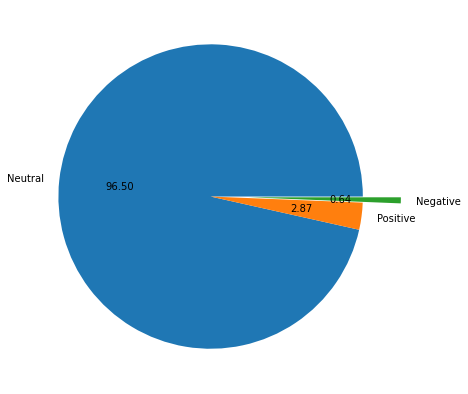

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%.2f')
#plt.legend()


<h3> <b> Sentiment analysis using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) adalah leksikon dan alat analisis sentimen berbasis aturan yang secara khusus disesuaikan dengan sentimen yang diungkapkan di media sosial.

Ini digunakan untuk analisis sentimen teks yang memiliki kedua polaritas yaitu positif/negatif. VADER digunakan untuk mengukur seberapa banyak emosi positif atau negatif yang dimiliki teks dan juga intensitas emosi.

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

Di sini, SentimentIntensityAnalyzer() adalah objek dan polarity_scores adalah metode yang akan memberi kita skor kategori berikut:

- Positif
- Negatif
- Netral

Menggabungkan Skor majemuk adalah jumlah skor positif, negatif & netral yang kemudian dinormalisasi antara -1 (negatif paling ekstrem) dan +1 (positif paling ekstrem).

Semakin banyak skor Compound mendekati +1, semakin tinggi kepositifan teks

In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,tweet,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral,0.0000,Neutral
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral,0.0000,Neutral
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral,0.0000,Neutral
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral,-0.5106,Negative
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral,0.0000,Neutral


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     303
Positive      8
Negative      3
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7d3e0647d0>,
 [Text(-1.1927399624788682, 0.13180053833694588, 'Neutral'),
  Text(1.089226685720569, -0.1535748257826948, 'Positive'),
  Text(1.0995045333693818, -0.0330118327297706, 'Negative')],
 [Text(-0.6957649781126729, 0.07688364736321843, '96.50'),
  Text(0.594123646756674, -0.08376808679056079, '2.55'),
  Text(0.5997297454742082, -0.018006454216238508, '0.96')])

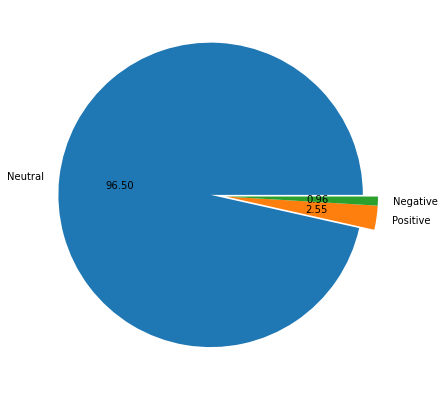

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0),  autopct='%.2f')
#plt.legend()

<h3> <b> Sentiment Analysis using SentiWordNet

Sentiwordnet   adalah   basis   data leksikal yang dibangun untuk mendukung pengklasifikasian sentiment  dan  proses-proses opinion  mining pada  aplikasi  [5]. Sentiwordnet berisi klasifikasi sentimentpositif,  negatif  dan  netral  dari seluruh synset Wordnet. Setiap synset(s)di dalam  Wordnet memiliki skor numerik dalam klasifikasi sentiment. Skor sentiment  pada  Sentiwordnet  terdiri  atas skor   Pos(s),   Neg(s)   dan   Obj(s)   yang mengindikasikan   nilai   seberapa   positif, negatif  dan  objektif  (netral)  istilah-istilah yang terdapat dalam suatu synset.

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue

        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        
        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"
        
fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,tweet,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral,0.0000,Neutral,0
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral,0.0000,Neutral,Positive
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral,-0.5106,Negative,Negative
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0


Saat menggunakan SentiWordNet, penting untuk mengetahui Parts of Speech untuk setiap kata yang ada dalam kamus. Bagian dari speech termasuk -
Noun (n) Verb (v) Adjective (a) Adverb Preposition Conjunction Pronoun Interjection Tiga yang pertama adalah yang paling umum digunakan saat meninjau sentimen sebuah kalimat

Polaritas setiap kata, dalam konteks dengan penandaan POS, ditemukan menggunakan fungsi sentiwordnet — pos_score(), neg_score() dan obj_score().

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

0           189
Neutral      96
Positive     20
Negative      9
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7d3e112150>,
 [Text(-0.34619269312743256, 1.0441027819257909, '0'),
  Text(0.03301180699400942, -1.0995045341420793, 'Neutral'),
  Text(1.0214524560056422, -0.4082093581975329, 'Positive'),
  Text(1.095543496486792, -0.09891636520563393, 'Negative')],
 [Text(-0.18883237806950867, 0.5695106083231586, '60.2%'),
  Text(0.018006440178550593, -0.5997297458956795, '30.6%'),
  Text(0.5571558850939866, -0.22265964992592702, '6.4%'),
  Text(0.5975691799018865, -0.05395438102125487, '2.9%')])

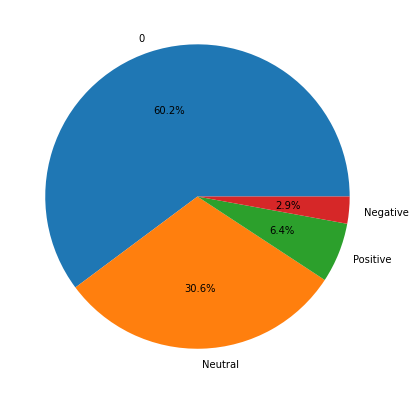

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

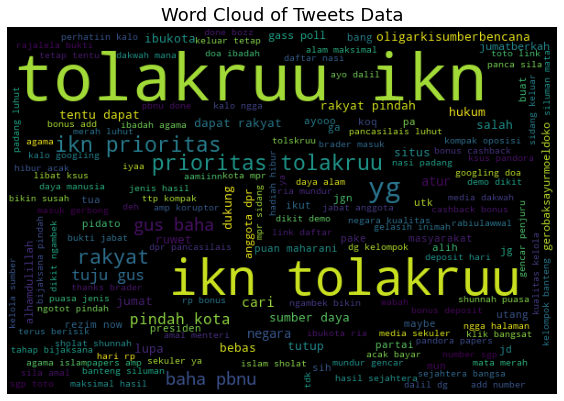

In [ ]:
list_words=''
for tweet in fin_data['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

<h2><b>Sentiment Analysis using Sastrawi

Sastrawi adalah proses setmming bahasa Indonesia. Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. 

In [ ]:
pip install sastrawi

     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [ ]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text


In [ ]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

In [ ]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

In [ ]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

In [ ]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
mydata['text_clean'] = mydata['Cleaned Reviews'].apply(casefoldingText)
fin_data['text_preprocessed'] = mydata['text_clean'].apply(tokenizingText)
fin_data['text_preprocessed'] = fin_data['text_preprocessed'].apply(filteringText)
fin_data['text_preprocessed'] = fin_data['text_preprocessed'].apply(stemmingText)

In [ ]:
fin_data

,tweet,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis,text_preprocessed
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral,0.0000,Neutral,0,"[tolakruu, ikn]"
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral,0.0000,Neutral,Positive,"[sumber, daya, manusia, negara, kualitas, kelo..."
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[tolakruu, ikn]"
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral,-0.5106,Negative,Negative,"[perhatiin, kalo, googling, doa, ibadah, agama..."
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[ttp, kompak, oposisi, tolakruu, ikn]"
...,...,...,...,...,...,...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[les, tolakruu, ikn, tolakruu, ikn]"
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum ...,0.0,Neutral,0.0000,Neutral,Neutral,"[masyarakat, papua, bantah, tuduh, kuasa, huku..."
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slo...,0.0,Neutral,0.0000,Neutral,Neutral,"[mun, lembur, ngaranna, bakiak, mun, kota, slo..."
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa...,0.0,Neutral,0.0000,Neutral,0,"[hmmmm, istana, pindah, nggak, yaa, buzzernya,..."


In [ ]:
lexicon_positive = dict()
lexicon_negative = dict()


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = fin_data['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
fin_data['polarity_score'] = results[0]
fin_data['polarity1'] = results[1]
print(fin_data['polarity1'].value_counts())

neutral    314
Name: polarity1, dtype: int64


In [ ]:
fin_data

,tweet,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis,text_preprocessed,polarity_score,polarity1
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral,0.0000,Neutral,0,"[tolakruu, ikn]",0,neutral
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral,0.0000,Neutral,Positive,"[sumber, daya, manusia, negara, kualitas, kelo...",0,neutral
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[tolakruu, ikn]",0,neutral
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral,-0.5106,Negative,Negative,"[perhatiin, kalo, googling, doa, ibadah, agama...",0,neutral
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[ttp, kompak, oposisi, tolakruu, ikn]",0,neutral
...,...,...,...,...,...,...,...,...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN,0.0,Neutral,0.0000,Neutral,0,"[les, tolakruu, ikn, tolakruu, ikn]",0,neutral
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum ...,0.0,Neutral,0.0000,Neutral,Neutral,"[masyarakat, papua, bantah, tuduh, kuasa, huku...",0,neutral
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slo...,0.0,Neutral,0.0000,Neutral,Neutral,"[mun, lembur, ngaranna, bakiak, mun, kota, slo...",0,neutral
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa...,0.0,Neutral,0.0000,Neutral,0,"[hmmmm, istana, pindah, nggak, yaa, buzzernya,...",0,neutral


([<matplotlib.patches.Wedge at 0x7f7d3cc39290>],
 [Text(-1.1, 1.3471114790620887e-16, 'neutral')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

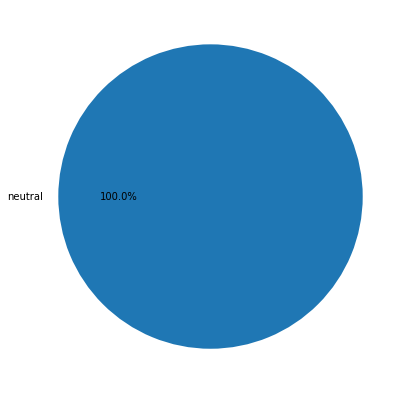

In [ ]:
sastrawi_counts= fin_data['polarity1'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(sastrawi_counts.values, labels = sastrawi_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

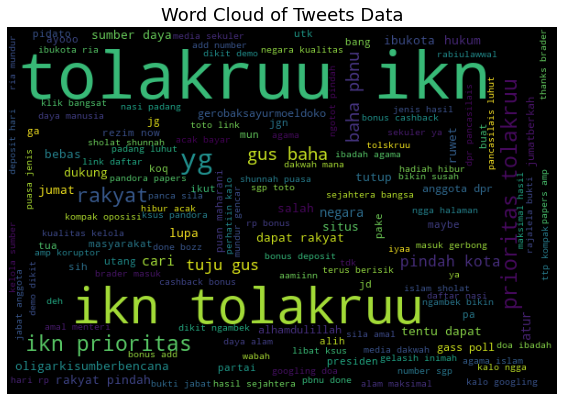

In [ ]:
# Visualize word cloud

list_words=''
for tweet in fin_data['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

<h2><b> Visual representation of TextBlob, VADER,SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f4d2a3c9190>],
 [Text(-1.1, 1.3471114790620887e-16, 'neutral')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

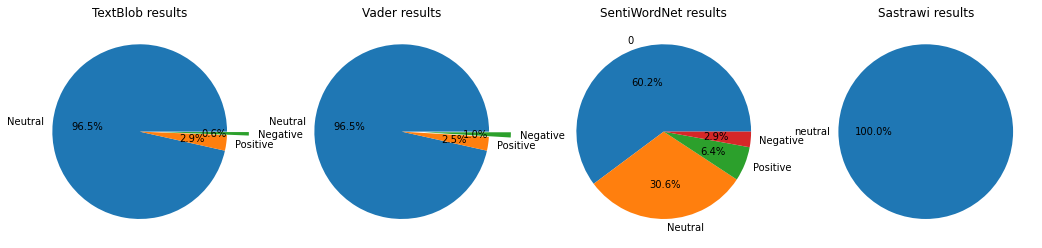

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,2)
plt.title("Vader results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,4)
plt.title("Sastrawi results")
plt.pie(sastrawi_counts.values, labels = sastrawi_counts.index, autopct='%1.1f%%', shadow=False)


Perbandingan analisis sentimen menggunakan TextBlob, VADER, SentiWordNet dan Sastrawi
- SentiWordNet menghasilkan polaritas yang paling tinggi diantara keempat metode yang lain
